In [1]:
import optforge as of
import nevergrad as ng
from optforge.benchmark.vobench_benchmarks import VOBenchmark
import vobench as vb
import numpy as np

inputs = vb.imread(r"F:\Stuff\Programming\AI\VOBench\VOBench\notebooks\affine\A2.jpeg")[:,:,0]
targets = vb.imread(r"F:\Stuff\Programming\AI\VOBench\VOBench\notebooks\affine\A.jpeg")[:,:,0]

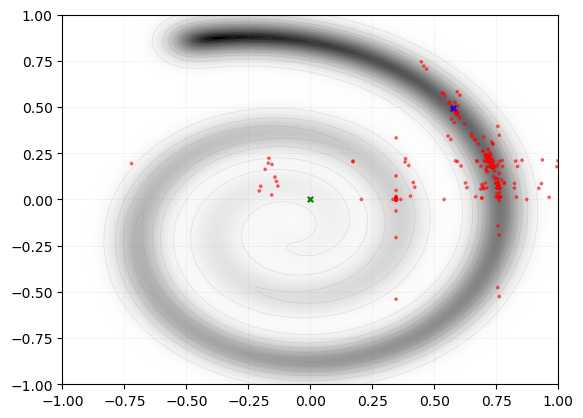

In [2]:
# nevergrad
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

optimizer = ng.optimizers.Powell(
    ng.p.Array(shape = (2,), lower = -1, upper = 1),
    budget = 1000
)

optimizer.minimize(vob.step_noline,)
vob.plot()

evals: 1000/1000 | best value: 0.3946                            
Job finished in 2.2s., did 1000 evaluations.


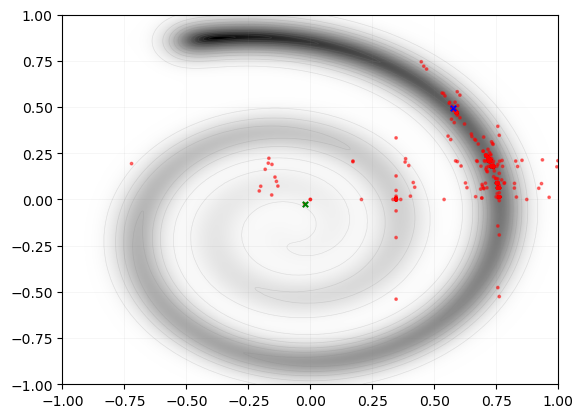

In [3]:
# optforge - scaling = nevergrad
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

optimizer = of.integrations.NevergradOptimizer(
    ng.optimizers.Powell,
)

study = of.minimize(
    vob.step_noline,
    vob.params,
    optimizer,
    max_evals = 1000,
    bounds = (-1, 1)
)
vob.plot()

# Powell transitional

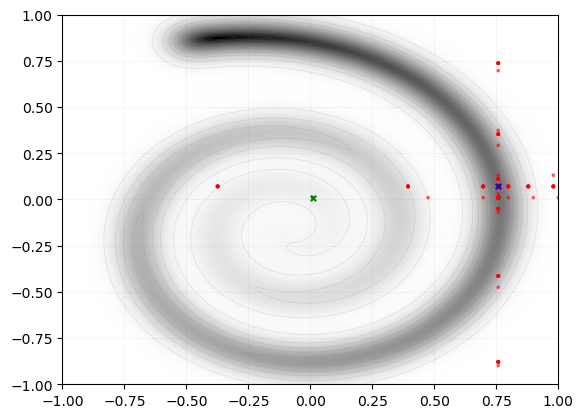

In [4]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

def ng_ojective(params):
    return vob.step_noline(np.array(params))

opt = ng.optimizers.Powell(ng.p.TransitionChoice(np.linspace(-1, 1, 100), repetitions=2, ordered=False), budget = 1000,)
opt.minimize(ng_ojective)
vob.plot()

evals: 1000/1000 | best value: 0.4559                            
Job finished in 16.2s., did 1000 evaluations.


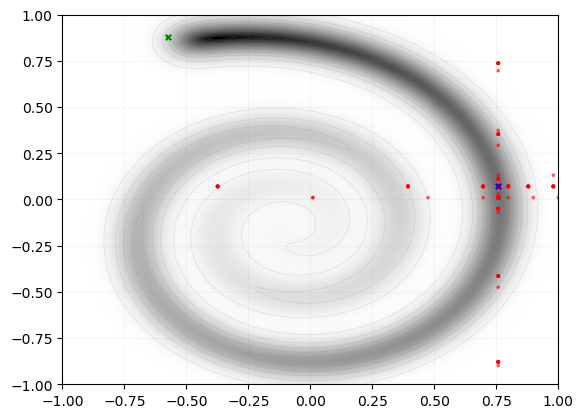

In [5]:
import numpy as np
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

def objective(trial: of.Trial):
    xy = trial.suggest_categorical_array('xy', 2, np.linspace(-1, 1, 100), one_hot=False)
    return vob.step_noline(np.array(xy))

optimizer = of.integrations.NevergradOptimizer(
    ng.optimizers.Powell,
)
study = of.minimize_trial_func(
    objective,
    optimizer,
    max_evals = 1000,
    progress=True,
)
vob.plot()

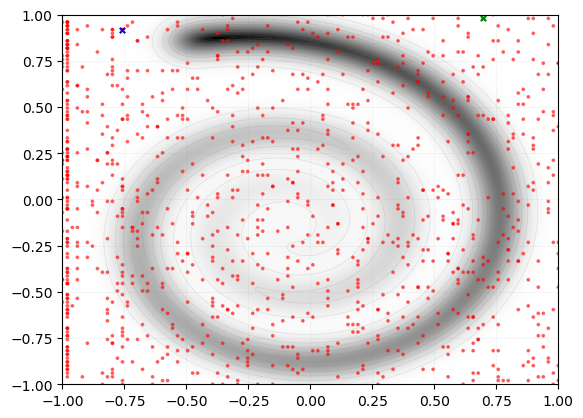

In [8]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

def ng_ojective(params):
    return vob.step_noline(np.array(params))

opt = ng.optimizers.Powell(ng.p.Choice(np.linspace(-1, 1, 100), repetitions=2,), budget = 1000,)
opt.minimize(ng_ojective)
vob.plot()

evals: 1000/1000 | best value: 0.2302                            
Job finished in 13.6s., did 1000 evaluations.


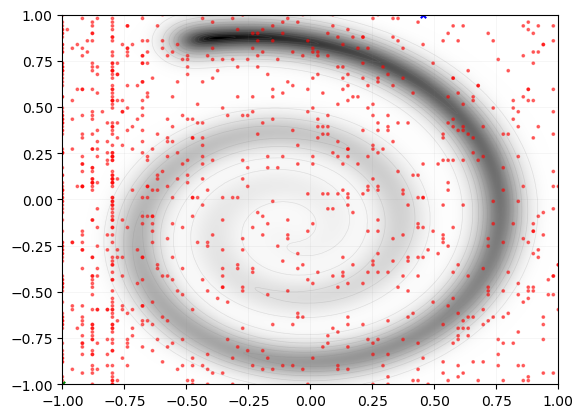

In [7]:
import numpy as np
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

def objective(trial: of.Trial):
    xy = trial.suggest_categorical_array('xy', 2, np.linspace(-1, 1, 100), one_hot=True)
    return vob.step_noline(np.array(xy))

optimizer = of.integrations.NevergradOptimizer(
    ng.optimizers.Powell,
)
study = of.minimize_trial_func(
    objective,
    optimizer,
    max_evals = 1000,
)
vob.plot()